In [31]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector as selector

import plotly.graph_objects as go
import plotly.express as px

from experiment_code import constants as const
#from experiment_code.preprocess import ExpSentences
from experiment_code.visualization.visualize import CoRTLanguageExp, EnglishVerif
from models.run_models import ThesisModel
from models import modeling

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
mod = ThesisModel(group = ['all'], subj = const.subj_id)
df = mod.load_dataframe()
df

,Unnamed: 0,local_date,experiment_id,experiment_version,participant_public_id,participant_id,task_name,task_version,spreadsheet_version,spreadsheet_row,...,cloze_cort,MOCA_mean,MOCA_std,SARA_mean,SARA_std,age,gender,public_id,years_of_education,etiology
0,0,20/07/2020 16:18:19,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,222.0,...,"non-CoRT, high cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
1,1,20/07/2020 16:18:26,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,223.0,...,"CoRT, high cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
2,2,20/07/2020 16:18:32,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,224.0,...,"non-CoRT, low cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
3,3,20/07/2020 16:18:39,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,225.0,...,"non-CoRT, low cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
4,4,20/07/2020 16:18:45,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,226.0,...,"CoRT, low cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
5,5,20/07/2020 16:18:51,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,227.0,...,"non-CoRT, low cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
6,6,20/07/2020 16:18:56,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,228.0,...,"non-CoRT, high cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
7,7,20/07/2020 16:19:02,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,229.0,...,"CoRT, low cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
8,8,20/07/2020 16:19:08,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,230.0,...,"non-CoRT, low cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN
9,9,20/07/2020 16:19:14,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,231.0,...,"non-CoRT, high cloze",28.0,NaN,NaN,NaN,51.936986,M,sAA,16,NaN


In [26]:
# initialize class 
#cort = CoRTLanguageExp()
#eng = EnglishVerif()
#df_eng = eng.load_dataframe()

# load df
#df = cort.load_dataframe()

#os.chdir(const.Defaults.PROCESSED_DIR)
#df = pd.read_csv("merged_preprocessed_dataframe.csv")
#df.columns #change format (e.g.index=False)

In [27]:
#incorp later based off thesis notes (prob need to change subj_list too)
#df_sca = df.query('group == "patient"')
#df_con = df.query('group == "control"')

fitting cort model for c01
fitting cort model for c02
fitting cort model for c03
fitting cort model for c04
fitting cort model for c06
fitting cort model for c07
fitting cort model for c08
fitting cort model for c09
fitting cort model for c10
fitting cort model for c11
fitting cort model for c12
fitting cort model for c13
fitting cort model for c14
fitting cort model for c15
fitting cort model for c16
fitting cort model for c17
fitting cort model for c18
fitting cort model for p01
fitting cort model for p02
fitting cort model for p03
fitting cort model for p04
fitting cort model for p05
fitting cort model for p07
fitting cort model for p09
fitting cort model for p10
fitting cort model for p12
fitting cort model for p13
fitting cort model for p14
fitting cort model for p15
fitting cort model for p16
fitting cort model for p17
fitting cloze model for c01
fitting cloze model for c02
fitting cloze model for c03
fitting cloze model for c04
fitting cloze model for c06
fitting cloze model for

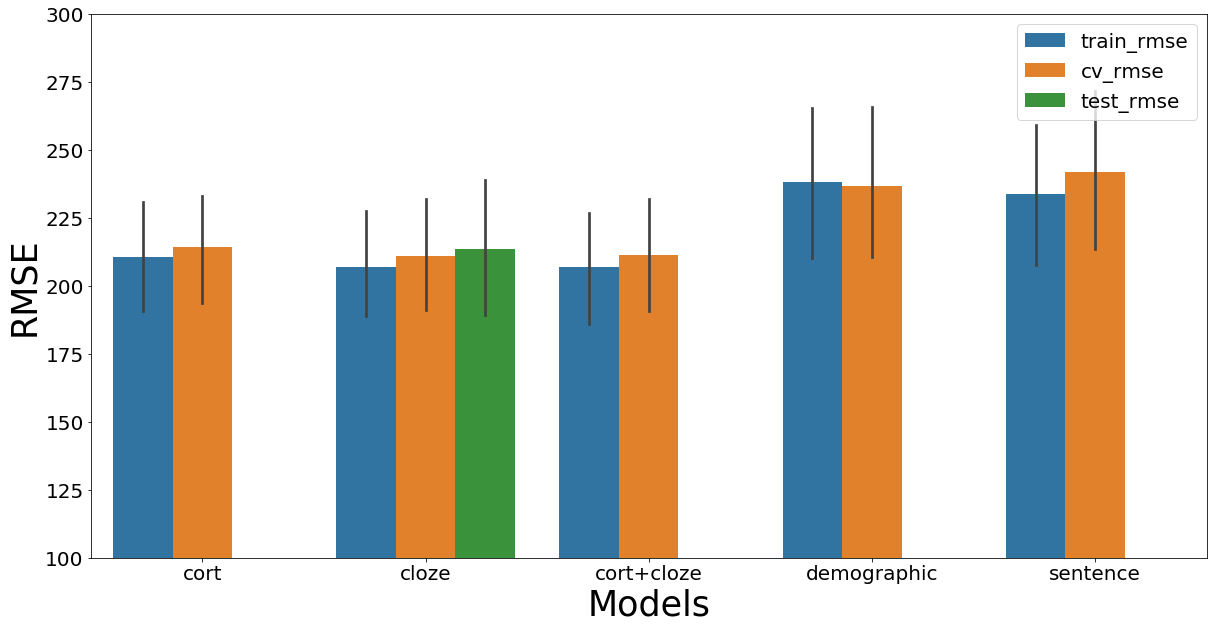

In [28]:
# run models

# NOTE:
# model functions have been saved in modeling.py and the high-level model routine has been saved in run_models.py
# to modify the models, go to get_model_features in modelling.py and hardcode in new model features

models = mod.run(dataframe=df,
            model_names=['cort', 'cloze', 'cort+cloze', 'demographic', 'sentence'])

#'cort', 'cloze','cort+cloze

#getting stats from?

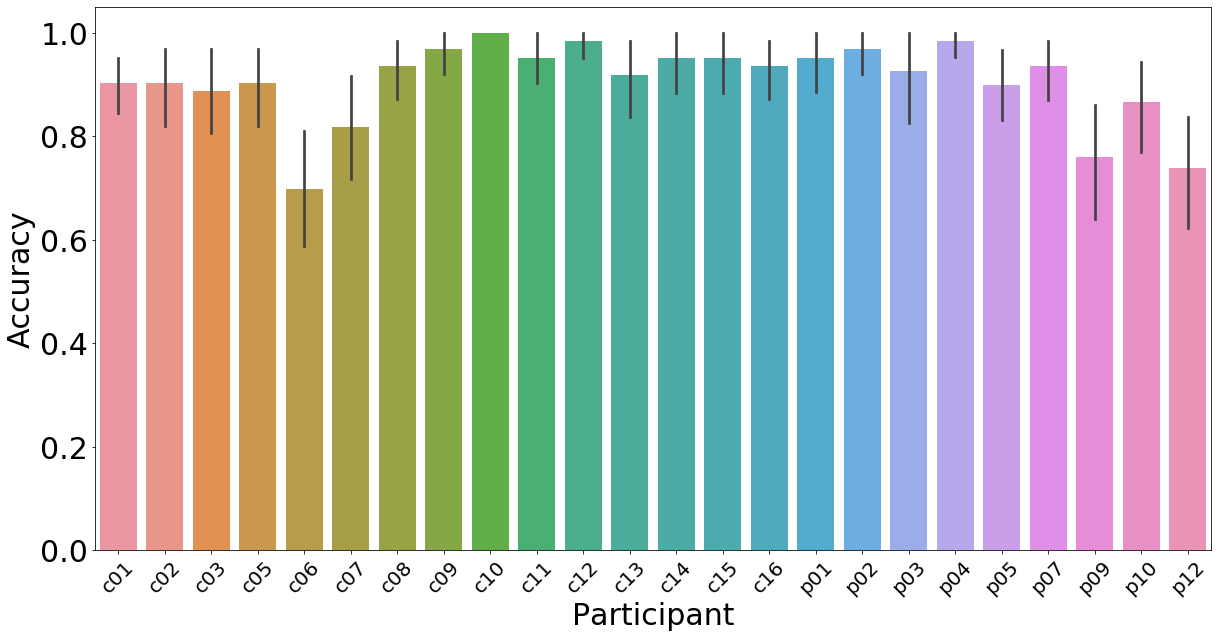

Answers mean: 0.9061662198391421 std 0.29169509771651


In [10]:
eng.participant_accuracy(df_eng)

In [126]:
df["correct"]*100

0       100.0
1       100.0
2       100.0
3       100.0
4         0.0
        ...  
9915    100.0
9916    100.0
9917    100.0
9918    100.0
9919    100.0
Name: correct, Length: 9920, dtype: float64

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

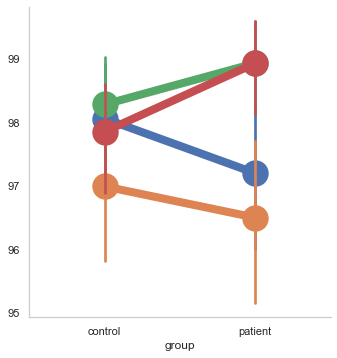

In [128]:
cort.accuracy_by_condition(df, x = "group", hue="cloze_cort")

AttributeError: 'FacetGrid' object has no attribute 'yaxis'

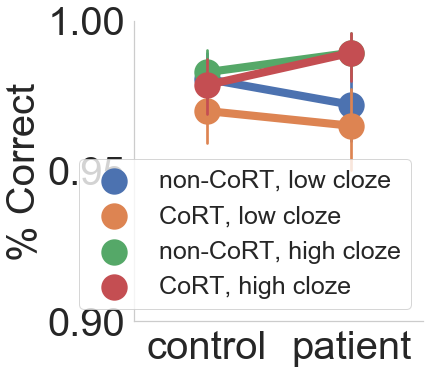

In [103]:
df_sca = df.query('group == "patient"')
df_con = df.query('group == "control"')
print('mean:', df.MOCA_mean.mean(), ', ', 'sd:', df.MOCA_mean.std())

mean: 26.43103448275862 ,  sd: 2.4486506215165575


In [51]:
#df['etiology'].unique()
df['etiology'].unique()

array([nan, 'SCA-6', 'SAOA', 'SCA', 'SCA-3', 'SCA-1'], dtype=object)

In [53]:
df['etiology'].isnull().values

array([ True,  True,  True, ..., False, False, False])

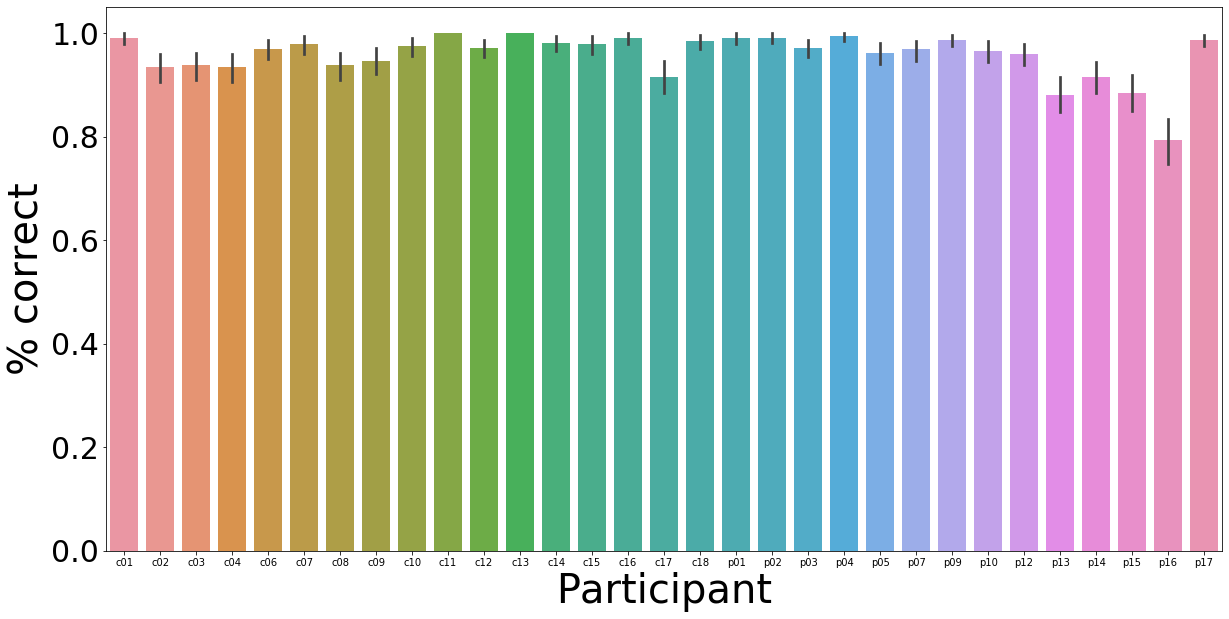

Answers mean: 0.957358870967742 Answers sd: 0.20205687013801896


In [56]:
cort.participant_accuracy(df)

In [33]:
df_grouped_all = df.groupby(['group', 'participant_public_id', 'cloze_descript','CoRT_descript'])['rt'].mean().reset_index()
df_grouped_cloze = df.groupby(['group', 'participant_public_id', 'cloze_descript'])['rt'].mean().reset_index()
df_grouped_cort = df.groupby(['group', 'participant_public_id', 'CoRT_descript'])['rt'].mean().reset_index()
df_grouped = df.groupby(['group', 'participant_public_id'])['rt'].mean().reset_index()

In [30]:
#btw groups
stats.ttest_ind(df_grouped.query('group=="patient"')['rt'], df_grouped.query('group=="control"')['rt'])

Ttest_indResult(statistic=5.02761572580406, pvalue=2.3491909283747868e-05)

In [35]:
control_rt_cort = df_grouped_cort.query('group=="control" and CoRT_descript=="CoRT"')['rt']
control_rt_non = df_grouped_cort.query('group=="control" and CoRT_descript=="non-CoRT"')['rt']
patient_rt_cort = df_grouped_cort.query('group=="patient" and CoRT_descript=="CoRT"')['rt']
patient_rt_non = df_grouped_cort.query('group=="patient" and CoRT_descript=="non-CoRT"')['rt']
#stats.ttest_ind(control_rt_cort, control_rt_non, patient_rt_cort, patient_rt_non)

In [36]:
#cort
cort_rt = df_grouped_cort.query('group=="control" and CoRT_descript=="CoRT"')['rt']
noncort_rt = df_grouped_cort.query('group=="control" and CoRT_descript=="non-CoRT"')['rt']
stats.ttest_ind(cort_rt, noncort_rt)

Ttest_indResult(statistic=-0.39773987268388233, pvalue=0.6934629326174988)

In [37]:
cort_rt = df_grouped_cort.query('group=="patient" and CoRT_descript=="CoRT"')['rt']
noncort_rt = df_grouped_cort.query('group=="patient" and CoRT_descript=="non-CoRT"')['rt']
stats.ttest_ind(cort_rt, noncort_rt)

Ttest_indResult(statistic=-0.10306928524010812, pvalue=0.9186988634660213)

In [34]:
cort_rt = df_grouped_all.query('group=="patient" and CoRT_descript=="CoRT" and cloze_descript=="low cloze"')['rt']
noncort_rt = df_grouped_all.query('group=="patient" and CoRT_descript=="non-CoRT" and cloze_descript=="low cloze"')['rt']
stats.ttest_ind(cort_rt, noncort_rt)

Ttest_indResult(statistic=-0.15004875766090436, pvalue=0.8818841130266005)

In [41]:
df_new = df[(df['correct']==1) & (df['trial_type']=="meaningful")].groupby(['participant_id', 'CoRT_descript'])['rt'].apply(lambda x: x.mean()).reset_index()
df_pivot = pd.pivot_table(df_new, index='participant_id', columns=['CoRT_descript'], values='rt').reset_index()
df_pivot['diff_rt'] = df_pivot['CoRT'] - df_pivot['non-CoRT'] 
df_pivot['group'] = df_pivot['participant_id'].apply(lambda x: 'control' if 'c' in x else 'patient')

In [42]:
control_dif_rt = df_pivot.query('group=="control"')['diff_rt']
patient_dif_rt = df_pivot.query('group=="patient"')['diff_rt']
stats.ttest_ind(control_dif_rt, patient_dif_rt)

Ttest_indResult(statistic=0.5065908586085045, pvalue=0.6162721065934826)

In [43]:
#cloze
high_rt = df_grouped_cloze.query('group=="control" and cloze_descript=="high cloze"')['rt']
low_rt = df_grouped_cloze.query('group=="control" and cloze_descript=="low cloze"')['rt']
stats.ttest_ind(high_rt, low_rt)

Ttest_indResult(statistic=-1.7183639779131137, pvalue=0.09539299955166676)

In [44]:
high_rt = df_grouped_cloze.query('group=="patient" and cloze_descript=="high cloze"')['rt']
low_rt = df_grouped_cloze.query('group=="patient" and cloze_descript=="low cloze"')['rt']
stats.ttest_ind(high_rt, low_rt)

Ttest_indResult(statistic=-1.4893083079107203, pvalue=0.14843742620754602)

In [45]:
df_new = df[(df['correct']==1) & (df['trial_type']=="meaningful")].groupby(['participant_id', 'cloze_descript'])['rt'].apply(lambda x: x.mean()).reset_index()
df_pivot = pd.pivot_table(df_new, index='participant_id', columns=['cloze_descript'], values='rt').reset_index()
df_pivot['diff_rt'] = df_pivot['high cloze'] - df_pivot['low cloze'] 
df_pivot['group'] = df_pivot['participant_id'].apply(lambda x: 'control' if 'c' in x else 'patient')

In [46]:
control_dif_rt = df_pivot.query('group=="control"')['diff_rt']
patient_dif_rt = df_pivot.query('group=="patient"')['diff_rt']
stats.ttest_ind(control_dif_rt, patient_dif_rt)

Ttest_indResult(statistic=0.9288982531820555, pvalue=0.3606096029217394)

In [58]:
F, p = f_oneway(df[df['group']=="patient"]['rt'], df[df['group']=="control"]['rt'])
print(f'F stat: {F}, p-value: {p}')

F stat: 1682.1261641911867, p-value: 0.0


In [59]:
F, p = f_oneway(df[df['cloze_descript']=="high cloze"]['rt'], df[df['cloze_descript']=="low cloze"]['rt'])
print(f'F stat: {F}, p-value: {p}')

F stat: 148.65263124251774, p-value: 5.973188081732606e-34


In [60]:
# group by whichever variables you are interested
# this will always be a list containing 'group', 'participant', and others ('condition_name', 'cort_descript' etc.)
df_grouped = df.groupby(['group', 'participant_public_id', 'cloze_descript','CoRT_descript'])['rt'].mean().reset_index()
# run an F test
# let's first run an F test (i.e. one-way ANOVA on RT diff between patient and control)
control_rt = df_grouped.query('group=="control"')['rt']
patient_rt = df_grouped.query('group=="patient"')['rt']
F, p = f_oneway(control_rt, patient_rt)
print(f'F={F}, p={p}')

F=94.42217358154947, p=7.048743376556e-17


In [62]:
control_rt_easy = df_grouped.query('group=="control" and cloze_descript=="high cloze"')['rt']
control_rt_hard = df_grouped.query('group=="control" and cloze_descript=="low cloze"')['rt']
patient_rt_easy = df_grouped.query('group=="patient" and cloze_descript=="high cloze"')['rt']
patient_rt_hard = df_grouped.query('group=="patient" and cloze_descript=="low cloze"')['rt']
F, p = f_oneway(control_rt_easy, control_rt_hard, patient_rt_easy, patient_rt_hard)
print(f'F={F}, p={p}')

F=37.08920107854648, p=4.933257772206309e-17


In [66]:
control_rt_cort = df_grouped.query('group=="control" and CoRT_descript=="CoRT"')['rt']
control_rt_non = df_grouped.query('group=="control" and CoRT_descript=="non-CoRT"')['rt']
patient_rt_cort = df_grouped.query('group=="patient" and CoRT_descript=="CoRT"')['rt']
patient_rt_non = df_grouped.query('group=="patient" and CoRT_descript=="non-CoRT"')['rt']
F, p = f_oneway(control_rt_cort, control_rt_non, patient_rt_cort, patient_rt_non)
print(f'F={F}, p={p}')

F=31.109405253012273, p=5.986826154767977e-15


In [80]:
cort_rt = df.query('group=="control" and CoRT_descript=="CoRT"')['rt']
noncort_rt = df.query('group=="control" and CoRT_descript=="non-CoRT"')['rt']
F, p = f_oneway(cort_rt, noncort_rt)
print(f'F stat: {F}, p-value: {p}')

F stat: 5.080827925871254, p-value: 0.02423145997941977


In [81]:
cort_rt = df.query('group=="patient" and CoRT_descript=="CoRT"')['rt']
noncort_rt = df.query('group=="patient" and CoRT_descript=="non-CoRT"')['rt']
F, p = f_oneway(cort_rt, noncort_rt)
print(f'F stat: {F}, p-value: {p}')

F stat: 0.3739330581080426, p-value: 0.5408992225839517


In [87]:
high_rt = df.query('group=="control" and cloze_descript=="high cloze"')['rt']
low_rt = df.query('group=="control" and cloze_descript=="low cloze"')['rt']
F, p = f_oneway(high_rt, low_rt)
print(f'F stat: {F}, p-value: {p}')

F stat: 97.10384268513671, p-value: 1.0185933047193489e-22


In [88]:
high_rt = df.query('group=="patient" and cloze_descript=="high cloze"')['rt']
low_rt = df.query('group=="patient" and cloze_descript=="low cloze"')['rt']
F, p = f_oneway(cort_rt, noncort_rt)
print(f'F stat: {F}, p-value: {p}')

F stat: 0.3739330581080426, p-value: 0.5408992225839517


In [74]:
df_new = df[(df['correct']==1) & (df['trial_type']=="meaningful")].groupby(['participant_id', 'CoRT_descript'])['rt'].apply(lambda x: x.mean()).reset_index()
df_pivot = pd.pivot_table(df_new, index='participant_id', columns=['CoRT_descript'], values='rt').reset_index()
df_pivot['diff_rt'] = df_pivot['non-CoRT'] - df_pivot['CoRT'] 
df_pivot['group'] = df_pivot['participant_id'].apply(lambda x: 'control' if 'c' in x else 'patient')

In [75]:
df_pivot

CoRT_descript,participant_id,CoRT,non-CoRT,diff_rt,group
0,c01,682.518365,671.323818,-11.194547,control
1,c02,819.438396,777.958077,-41.480319,control
2,c03,972.346154,966.060000,-6.286154,control
3,c04,791.992157,785.273519,-6.718638,control
4,c06,692.989712,654.382818,-38.606893,control
5,c07,744.930741,759.940755,15.010014,control
6,c08,683.566132,731.713269,48.147137,control
7,c09,688.907925,748.830900,59.922975,control
8,c10,626.545455,606.907407,-19.638047,control
9,c11,603.762273,614.734545,10.972273,control


In [79]:
control_dif_rt = df_pivot.query('group=="control"')['diff_rt']
patient_dif_rt = df_pivot.query('group=="patient"')['diff_rt']
F, p = f_oneway(control_dif_rt, patient_dif_rt)
print(f'F stat: {F}, p-value: {p}')

F stat: 2.0831169844697413, p-value: 0.1596518802793405


In [89]:
high_rt = df.query('group=="control" and cloze_descript=="high cloze"')['rt']
low_rt = df.query('group=="control" and cloze_descript=="low cloze"')['rt']
F, p = f_oneway(high_rt, low_rt)
print(f'F stat: {F}, p-value: {p}')

F stat: 97.10384268513671, p-value: 1.0185933047193489e-22


In [76]:
F, p = f_oneway(df_pivot[df_pivot["non-CoRT"]] - df_pivot[df_pivot["CoRT"]])
print(f'F stat: {F}, p-value: {p}')

KeyError: "None of [Float64Index([  671.323818181091,   777.958076923044,             966.06,\n               785.2735185178635,  654.3828181858936,  759.9407547144747,\n               731.7132692316171,  748.8309000000753,  606.9074074074042,\n               614.7345454545152,  804.5138181758706,  793.4363636363578,\n               769.2787963013096,  1175.381818181833,  784.1703636352248,\n               792.7411320753273,   706.622641509434,  908.7967924506838,\n              1055.7797222605182, 1032.5066664566596,  827.9454629626815,\n               1094.844150943418, 1270.9835849049994,   998.122181834399,\n               853.9641509434166, 1161.6563207540607,  908.3385416840125,\n                         1106.74,  987.4920248483785,  980.5037499913437,\n               811.1490909110628],\n             dtype='float64', name='CoRT_descript')] are in the [columns]"

In [82]:
df_new = df[(df['correct']==1) & (df['trial_type']=="meaningful")].groupby(['participant_id', 'cloze_descript'])['rt'].apply(lambda x: x.mean()).reset_index()
df_pivot = pd.pivot_table(df_new, index='participant_id', columns=['cloze_descript'], values='rt').reset_index()
df_pivot['diff_rt'] = df_pivot['high cloze'] - df_pivot['low cloze'] 
df_pivot['group'] = df_pivot['participant_id'].apply(lambda x: 'control' if 'c' in x else 'patient')

In [83]:
control_dif_rt = df_pivot.query('group=="control"')['diff_rt']
patient_dif_rt = df_pivot.query('group=="patient"')['diff_rt']
F, p = f_oneway(control_dif_rt, patient_dif_rt)
print(f'F stat: {F}, p-value: {p}')

F stat: 0.8628519647646749, p-value: 0.36060960292173894


fitting rt model for c01
fitting rt model for c02
fitting rt model for c03
fitting rt model for c04
fitting rt model for c06
fitting rt model for c07
fitting rt model for c08
fitting rt model for c09
fitting rt model for c10
fitting rt model for c11
fitting rt model for c12
fitting rt model for c13
fitting rt model for c14
fitting rt model for c15
fitting rt model for c16
fitting rt model for c17
fitting rt model for c18
fitting rt model for p01
fitting rt model for p02
fitting rt model for p03
fitting rt model for p04
fitting rt model for p05
fitting rt model for p07
fitting rt model for p09
fitting rt model for p10
fitting rt model for p12
fitting rt model for p13
fitting rt model for p14
fitting rt model for p15
fitting rt model for p16
fitting rt model for p17
fitting cort model for c01
fitting cort model for c02
fitting cort model for c03
fitting cort model for c04
fitting cort model for c06
fitting cort model for c07
fitting cort model for c08
fitting cort model for c09
fitting c

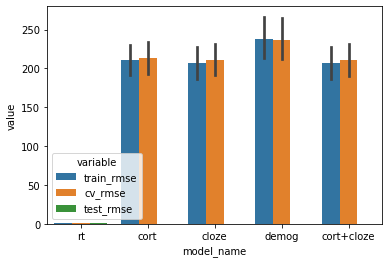

In [8]:
models = run_models.run(dataframe=df, model_names=['rt','cort', 'cloze', 'demog','cort+cloze'])

In [9]:
models

,train_rmse,cv_rmse,test_rmse,model_name,subj
0,0.365458,0.457913,0.407551,rt,c01
1,1.053191,1.312083,1.169208,rt,c02
2,0.904520,1.119117,0.776055,rt,c03
3,0.775192,0.944664,0.809726,rt,c04
4,0.677251,0.834038,0.470081,rt,c06
5,0.910974,1.121445,1.126225,rt,c07
6,0.825606,1.017259,0.788399,rt,c08
7,0.829013,1.008920,0.621064,rt,c09
8,0.677761,0.841814,0.670650,rt,c10
9,0.535976,0.651825,0.691628,rt,c11


In [6]:
def get_model_features(model_name):
    """Hardcode model features for `model_name`
    
    Args: 
        model_name (str): 'eyetracking' etc
    Returns: 
        quant_features (list of str), qual_features (list of str)
    """
    #ALTER FOR EXP
    if model_name=='cort':
        quant_features = ['correct']
        qual_features = ['CoRT_descript', 'group', 'trial_type']
    elif model_name=='rt':
        quant_features = ['rt']
        qual_features = []
    elif model_name=='cloze':
        quant_features = ['correct']
        qual_features = ['cloze_descript', 'group', 'trial_type']
    elif model_name=='demog':
        quant_features = ['years_of_education', 'age', 'MOCA_total_score', 'SARA_total_score']
        qual_features = ['group', 'gender'] #input array of etiology? ignore skewed gender?
    elif model_name=='cort+cloze':
        quant_features = ['correct']
        qual_features = ['CoRT_descript', 'cloze_descript', 'group', 'trial_type']
    elif model_name=='combined':
        quant_features = ['correct','years_of_education', 'age', 'MOCA_total_score', 'SARA_total_score']
        qual_features = ['CoRT_descript', 'cloze_descript', 'group', 'trial_type']
    else:
        print('please define model type')
        
    return quant_features, qual_features

In [7]:
def model_fitting(dataframe, model_name, subj_id, data_to_predict):
    """Fits n models (n=length of model names) on `subj_id`
    
    Args: 
        dataframe (pd dataframe): containing columns `corr_resp` and model predictors
        model_names (str): model name as defined in `get_model_features`
        subj_id (str): we're fitting the model on individual subjects
        data_to_predict (str): `corr_resp` or `rt`
    Returns: 
        fitted model (sklearn obj)
    """
    
    # filter dataframe for `subj`
    dataframe = dataframe[dataframe['participant_id']==subj_id]

    # shuffle data before splitting
    shuffled_data = dataframe.sample(frac=1., random_state=42)

    # now split up the datasets into training and testing
    train, test = train_test_split(shuffled_data, test_size=0.1, random_state=83)

    # get model features
    quant_features, qual_features = get_model_features(model_name)

    # define model
    model = define_model(quant_features, qual_features)

    # fit model
    fitted_model = fit_model(model, X=train, y=train[data_to_predict])
    #inspect weights 

    print(f'fitting {model_name} model for {subj_id}')

    return fitted_model, train, test

In [30]:
#for model_name in model_names:

    #for subj in const.subj_id:

fitted_model, train, test = modeling.model_fitting(dataframe=df, 
                                        model_name='cort', 
                                        subj_id=const.subj_id[1],
                                        data_to_predict='rt')

fitting cort model for c02


In [29]:
test

,Unnamed: 0,local_date,experiment_id,experiment_version,participant_public_id,participant_id,task_name,task_version,spreadsheet_version,spreadsheet_row,...,group_trial_type,cloze_cort,public_id,gender,years_of_education,age,MOCA_mean,MOCA_std,SARA_mean,SARA_std
473,473,22/07/2020 13:54:35,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,312.0,...,control: meaningless,"CoRT, high cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
496,496,22/07/2020 13:56:57,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,335.0,...,control: meaningful,"non-CoRT, high cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
578,578,22/07/2020 14:06:43,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,29.0,...,control: meaningful,"non-CoRT, low cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
440,440,22/07/2020 13:49:55,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,278.0,...,control: meaningful,"CoRT, high cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
510,510,22/07/2020 13:58:20,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,349.0,...,control: meaningful,"CoRT, high cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
472,472,22/07/2020 13:54:29,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,311.0,...,control: meaningful,"CoRT, high cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
627,627,22/07/2020 14:11:50,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,78.0,...,control: meaningful,"CoRT, low cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
416,416,22/07/2020 13:47:28,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,254.0,...,control: meaningful,"CoRT, high cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
366,366,22/07/2020 13:41:26,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,138.0,...,control: meaningful,"CoRT, low cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN
385,385,22/07/2020 13:44:08,21978.0,5.0,sAE,c02,cort_prepilot_task,34.0,FINAL sentences,223.0,...,control: meaningless,"CoRT, high cloze",sAE,M,16.0,51.40274,26.0,NaN,NaN,NaN


In [8]:
def rmse(y, yhat):
    """Calculates root mean square error
    
    Args: 
        y (np array): true y values
        yhat (np array): predicted y values
    Returns: 
        rmse (np array)
    """
    return np.sqrt(np.mean((y - yhat)**2))

In [9]:
def cross_validate_rmse(model, train, data_to_predict):
    """Cross validates training data
    
    Args: 
        model (sklearn obj): must contain `fit` and `predict`
        train (pd dataframe): shape (n_obs, regressors)
        data_to_predict (str): `corr_resp` or `rt`
    Returns: 
        CV rmse (scalar)
    """
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(train):
        model.fit(train.iloc[tr_ind,:], train[data_to_predict].iloc[tr_ind])
        rmse_values.append(rmse(train[data_to_predict].iloc[va_ind], model.predict(train.iloc[va_ind,:])))
    return np.mean(rmse_values)

In [10]:
def compute_train_cv_error(model, train, test, data_to_predict):
    # Compute the training error for each model
    training_rmse = rmse(train[data_to_predict], model.predict(train))

    # Compute the cross validation error for each model
    validation_rmse = cross_validate_rmse(model, train, data_to_predict)

    # Compute the test error for each model (don't do this!)
    # WE SHOULD BE TESTING THE WINNING MODEL HERE (WHICHEVER MODEL YIELDED LOWEST TRAIN AND CV ERROR)
    #     test_rmse = rmse(test[data_to_predict], model.predict(test))
    
    return training_rmse, validation_rmse

In [11]:
def compare_models(model_results):
    """Does model comparison and visualizes RMSE for training and validation
    
    Args: 
        model_results (pd dataframe): must contain 'train_rmse', 'cv_rmse', 'model_name'
        
    Returns: 
        Plot comparing model performance (training RMSE versus CV RMSE)
    """
    model_names = model_results['model_name'].unique() #LINE NOT WORKING
    fig = go.Figure(
        [go.Bar(x=model_names, y=model_results['train_rmse'], name='Training RMSE'),
        go.Bar(x=model_names, y=model_results['cv_rmse'], name='CV RMSE')]
        )
    fig.update_yaxes({'range': [0.4, 0.45]})

    return fig

In [12]:
def define_model(quant_features, qual_features):
    """Define model
        
    Args: 
        quant_features (list of str): corresponding to column names of training data
        qual_features (list of str): corresponding to column names of training data
    Returns: 
        model (sklearn obj)
    """
    # transform numeric data
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
    
    # transform categorical data
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, quant_features), # selector(dtype_exclude="category")
            ('cat', categorical_transformer, qual_features)
        ])
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ("Ridge", Ridge())
    ])
    
    return model

In [13]:
def fit_model(model, X, y):
    """Fit model
    
    Args: 
        model (sklearn obj):
        X (pd dataframe): X, shape (n_obs, n_predictors)
        y (series): y, shape (n_obs, 1)
    Returns:
        fitted sklearn model
    """
    return model.fit(X, y)

,Unnamed: 0,local_date,experiment_id,experiment_version,participant_public_id,participant_id,task_name,task_version,spreadsheet_version,spreadsheet_row,...,group_trial_type,cloze_cort,public_id,gender,years_of_education,age,MOCA_mean,MOCA_std,SARA_mean,SARA_std
0,0,20/07/2020 16:18:19,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,222.0,...,control: meaningless,"non-CoRT, high cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
1,1,20/07/2020 16:18:26,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,223.0,...,control: meaningless,"CoRT, high cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
2,2,20/07/2020 16:18:32,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,224.0,...,control: meaningful,"non-CoRT, low cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
3,3,20/07/2020 16:18:39,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,225.0,...,control: meaningful,"non-CoRT, low cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
4,4,20/07/2020 16:18:45,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,226.0,...,control: meaningful,"CoRT, low cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
5,5,20/07/2020 16:18:51,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,227.0,...,control: meaningless,"non-CoRT, low cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
6,6,20/07/2020 16:18:56,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,228.0,...,control: meaningful,"non-CoRT, high cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
7,7,20/07/2020 16:19:02,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,229.0,...,control: meaningless,"CoRT, low cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
8,8,20/07/2020 16:19:08,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,230.0,...,control: meaningless,"non-CoRT, low cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
9,9,20/07/2020 16:19:14,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,231.0,...,control: meaningless,"non-CoRT, high cloze",sAA,M,16.0,51.920548,28.0,NaN,NaN,NaN
